## Análise Exploratória - Renner

<center><img width="60%" src="Arquivos/renner.jpg"></center>


## Análise dos Dados

Esta etapa tem por objetivo permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `Business` - Nome da franquia/loja
* `Opening date` - Data de abertura da loja
* `Opening quarter` - Período de abertura da loja
* `Closing date` - Data de fechamento da loja
* `Closing quarter` - Período de fechamento da loja
* `Country` - País em que a loja se encontra
* `Region` - Região em que a loja se encontra
* `UF` - UF em que a loja se encontra
* `State` - Estado em que a loja se encontra
* `City` - Cidade em que a loja se encontra
* `Capital` - Se a cidade é capital do estado ou não
* `Location` - Localização da loja
* `Shopping Mall / Street` - Se a loja está em shopping ou em rua
* `Total Area (m2)` - Área total da loja em metros quadrados
* `Total number of stores per business` - Número total de lojas por negócio
* `Total number of stores` - Número total de lojas

### Importando os dados do dataset

In [3]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import math
from scipy import stats

%matplotlib inline
# tamanho dos gráficos
plt.rcParams["figure.figsize"] = [10,5]
# tamanho dos dados
plt.rcParams["font.size"] = 12
# tamanho das colunas a exibir os dados
pd.set_option('display.max_rows', 67)

# configurar a fonte
plt.rcParams['font.family'] = 'Arial'

# configurar as cores que usarei no plot
AZUL = "#003F5c" 
CINZA = "#9E9E9E"
CINZA_TEXTO = "#515151"

In [68]:
# importar o dataframe em xlsx
df = pd.read_excel("Arquivos/lojas_renner.xlsx", index_col="Opening date")

## Análise Exploratória dos Dados

Na análise exploratória de dados será efetuada uma explanação inicial das variáveis contidas na dataset, e entenderemos dados referentes a informações de cunho geral.

In [69]:
# Visualizar as 5 primeiras entradas
df.head()

,Business,Opening quarter,Closing date,Closing quarter,Country,Region,UF,State,City,Capital,Location,Shopping Mall / Street,Total Area (m2),Total number of stores per business,Total number of stores
Opening date,,,,,,,,,,,,,,,
2022-09-29,Ashua,3Q22,NaT,NaN,Brazil,Southest,MG,Minas Gerais,Belo Horizonte,S,Shopping Boulevard BH,Shopping Mall,210.0,11,663
2022-09-23,Youcom,3Q22,NaT,NaN,Brazil,Northest,CE,Ceará,Fortaleza,S,Shopping Iguatemi Fortaleza,Shopping Mall,260.0,113,662
2022-09-14,Camicado,3Q22,NaT,NaN,Brazil,South,SC,Santa Catarina,Chapecó,N,Shopping Pátio Chapecó,Shopping Mall,615.0,123,661
2022-09-13,Renner,3Q22,NaT,NaN,Brazil,South,RS,Rio Grande do Sul,Alegrete,N,Loja Alegrete,Street,1829.0,416,660
2022-09-08,Renner,3Q22,NaT,NaN,Brazil,South,RS,Rio Grande do Sul,Carazinho,N,Loja Carazinho,Street,1476.0,415,659


In [70]:
# Visualizar o tamanho do dataframe
print("Entradas: ", df.shape[0])
print("Variáveis: ", df.shape[1])

Entradas:  696
Variáveis:  15


In [71]:
# Extrair o nome das colunas
df.columns

Index(['Business', 'Opening quarter', 'Closing date', 'Closing quarter',
       'Country', 'Region', 'UF', 'State', 'City', 'Capital', 'Location',
       'Shopping Mall / Street', 'Total Area (m2)',
       'Total number of stores per business', 'Total number of stores'],
      dtype='object')

In [72]:
# Extrair o tipo das variáveis
df.dtypes

Business                                       object
Opening quarter                                object
Closing date                           datetime64[ns]
Closing quarter                                object
Country                                        object
Region                                         object
UF                                             object
State                                          object
City                                           object
Capital                                        object
Location                                       object
Shopping Mall / Street                         object
Total Area (m2)                               float64
Total number of stores per business             int64
Total number of stores                          int64
dtype: object

In [73]:
# Porcentagem de itens nulos
(df.isnull().sum()/df.shape[0]).sort_values(ascending = True) * 100

Business                                0.000000
Opening quarter                         0.000000
Country                                 0.000000
Region                                  0.000000
UF                                      0.000000
State                                   0.000000
City                                    0.000000
Capital                                 0.000000
Location                                0.000000
Shopping Mall / Street                  0.000000
Total Area (m2)                         0.000000
Total number of stores per business     0.000000
Total number of stores                  0.000000
Closing date                           95.258621
Closing quarter                        95.258621
dtype: float64

### Q1. Qual a quantidade de franquias/lojas que a Renner atua?

In [74]:
df['Business'].value_counts()

Renner      427
Camicado    132
Youcom      126
Ashua        11
Name: Business, dtype: int64

### Q2. Qual a data da primeira abertura de loja?

In [76]:
df.index.min()

Timestamp('1967-06-01 00:00:00')

### Q3. Qual a data da última abertura de loja?

In [77]:
df.index.max()

Timestamp('2022-09-29 00:00:00')

### Q4. Qual a proporção de lojas na rua e em shopping?

In [78]:
# valores absolutos
df['Shopping Mall / Street'].value_counts()

Shopping Mall    644
Street            52
Name: Shopping Mall / Street, dtype: int64

In [79]:
# porcentagem
df['Shopping Mall / Street'].value_counts()/df.shape[0] * 100

Shopping Mall    92.528736
Street            7.471264
Name: Shopping Mall / Street, dtype: float64

### Gráfico da abertura de lojas ao longo do tempo

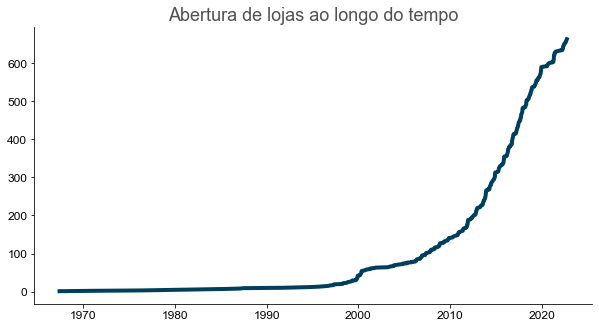

In [81]:
fig, ax = plt.subplots(figsize = (10,5), dpi = 72)

renner = df['Total number of stores']
ax.grid(False)
ax.plot(renner, color = AZUL, linewidth = 4)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# title
ax.set_title('Abertura de lojas ao longo do tempo', fontsize=18, color=CINZA_TEXTO)

plt.show()


### Análise Territorial

### Q5. Qual a proporção de lojas nos países?

In [82]:
df['Country'].value_counts()

Brazil       682
Uruguay       10
Argentina      4
Name: Country, dtype: int64

Analisaremos apenas os dados referentes ao Brasil, que é nossa zona de interesse.

In [84]:
renner = df.loc[df['Country'] == 'Brazil']

### Q6. Qual a quantidade de lojas por região?

In [85]:
# valores absolutos
renner['Region'].value_counts()

Southest    342
South       158
Northest     93
Midwest      57
North        32
Name: Region, dtype: int64

In [86]:
# porcentagem
renner['Region'].value_counts()/renner.shape[0] * 100

Southest    50.146628
South       23.167155
Northest    13.636364
Midwest      8.357771
North        4.692082
Name: Region, dtype: float64

### Q7. Qual a quantidade de lojas por UF?

In [90]:
# valores absolutos
renner['UF'].value_counts()

SP    217
RS     81
RJ     60
MG     50
SC     41
PR     36
DF     20
BA     19
PE     18
GO     18
CE     15
ES     15
PA     12
MT     12
MA      9
AM      9
RN      8
MS      7
AL      7
SE      6
PI      6
PB      5
RO      4
AP      2
TO      2
RR      2
AC      1
Name: UF, dtype: int64

In [91]:
# porcentagem
renner['UF'].value_counts()/renner.shape[0] * 100

SP    31.818182
RS    11.876833
RJ     8.797654
MG     7.331378
SC     6.011730
PR     5.278592
DF     2.932551
BA     2.785924
PE     2.639296
GO     2.639296
CE     2.199413
ES     2.199413
PA     1.759531
MT     1.759531
MA     1.319648
AM     1.319648
RN     1.173021
MS     1.026393
AL     1.026393
SE     0.879765
PI     0.879765
PB     0.733138
RO     0.586510
AP     0.293255
TO     0.293255
RR     0.293255
AC     0.146628
Name: UF, dtype: float64

### Q8. Quanto capitais representam o número total de lojas?

Valor bem equilibrado, sendo 50.58% capitais e 49.41% das lojas não.

In [92]:
renner['Capital'].value_counts()

S    345
N    337
Name: Capital, dtype: int64

In [93]:
renner['Capital'].value_counts()/renner.shape[0] * 100

S    50.58651
N    49.41349
Name: Capital, dtype: float64

### Q9. Qual a proporção de lojas que são shopping ou estão na rua?

In [94]:
renner['Shopping Mall / Street'].value_counts()

Shopping Mall    633
Street            49
Name: Shopping Mall / Street, dtype: int64

In [95]:
renner['Shopping Mall / Street'].value_counts()/renner.shape[0] * 100

Shopping Mall    92.815249
Street            7.184751
Name: Shopping Mall / Street, dtype: float64

### Q10. Quais os 10 principais shoppings com lojas Renner?

In [98]:
renner['Location'].value_counts()[:10]

Shopping Ibirapuera       4
Shopping Riomar Recife    4
Shopping ABC              4
ParkShopping Canoas       3
Shopping Vitória          3
Shopping Pelotas          3
Shopping Campo Grande     3
Shopping Eldorado         3
Shopping Recife           3
Shopping Piracicaba       3
Name: Location, dtype: int64

### Informações Relevantes

Em relação aos fluxos de consumidores online, foram +247 milhões de visitas (-9% versus 2T21), sendo 63% via app.
A redução dos fluxos online deveu-se principalmente ao maior fluxo nas lojas físicas, dada a retomada das redes sociais interações e maior mobilidade, refletindo o aumento do CAC em relação ao 2T21. No período, foram +3,8 milhões de downloads e 7,6 milhões de usuários (16% vs 2T21), resultando mais uma vez na Companhia assumindo liderança absoluta no ranking de Usuários Ativos Mensais (MAU) entre os players nacionais segundo dados publicado pela AppAnnie e SimilarWeb. A base de clientes ativos do ecossistema continuou a se expandir para atingir 18,9 milhões de clientes, um aumento de
18,9% em relação ao segundo trimestre de 2021, impulsionado pelo crescimento de novos clientes em lojas físicas e
por clientes omni. A retenção foi de 4 p.p. superior ao mesmo período de 2021. 

Para maximizar as vendas de cada região e reduzir a necessidade de remarcações, houve um maior foco na estratégia de clusterização de coleções com esquemas de cores e padrões apropriados para a região em particular. In Time to Market – uma das prioridades estratégicas da Companhia do ano –, além das coleções digitais da marca esportiva Get Over, houve expansão o uso da máquina de estampagem de tecidos com o benefício de uma melhoria na reatividade através da demanda do cliente.